In [6]:
import scipy as sp 
import numpy as np 

### Задание 1

In [6]:
def multiplicate_method(m, a, b, X0, n):
    X = np.zeros(n, dtype=np.uint32)
    X[0] = X0
    
    # Генерация чисел по формуле
    for i in range(1, n):
        X[i] = (a * X[i - 1] + b) % m
    
    return X

# Задаем параметры
a = 22695477
b = 1
m = 2**32
X0 = 1000   
n = 10    

sequence = multiplicate_method(m, a, b, X0, n)
print(sequence)

[      1000 1220640521 3069053662  379839479 3141104676 1022362485
 1793088826 2101278979 2885056416 1622770721]


### Задание 2

In [18]:
def generate_uniform_sequence(A, B, n, X0=1):
    # Параметры для мультипликативного метода
    a = 22695477
    b = 1
    m = 2**32
    
    random_sequence = multiplicate_method(m, a, b, X0, n)
    # Применение модульной арифметики для ограничения значений в диапазоне [A, B)
    uniform_sequence = random_sequence % (B - A) + A
    
    return uniform_sequence

A = 0
B = 10

lengths = [10**2, 10**3, 10**4, 10**5]

for length in lengths:
    sequence = generate_uniform_sequence(A, B, length)
    print(f"Generated sequence of length {length}:")
    print(sequence[:20])   
    print()

Generated sequence of length 100:
[1 8 5 0 1 2 9 0 3 4 3 0 1 4 7 2 5 6 7 2]

Generated sequence of length 1000:
[1 8 5 0 1 2 9 0 3 4 3 0 1 4 7 2 5 6 7 2]

Generated sequence of length 10000:
[1 8 5 0 1 2 9 0 3 4 3 0 1 4 7 2 5 6 7 2]

Generated sequence of length 100000:
[1 8 5 0 1 2 9 0 3 4 3 0 1 4 7 2 5 6 7 2]



### Задание 3

In [19]:
def calculate_mean(sequence):
    n = len(sequence)
    mean = sum(sequence) / n
    return mean

def calculate_variance(sequence, mean):
    n = len(sequence)
    variance =  (sum([x**2 for x in sequence])/n - mean**2) * n/(n-1)
    return variance

# Задаем диапазон [A, B)
A = 0
B = 10

# Длины последовательностей
lengths = [10**2, 10**3, 10**4, 10**5]

# Теоретические значения
theoretical_mean = (A + B) / 2
theoretical_variance = (B - A)**2 / 12

# Генерация последовательностей, расчет мат ожидания и дисперсии
for length in lengths:
    sequence = generate_uniform_sequence(A, B, length)
    
    mean = calculate_mean(sequence)
    variance = calculate_variance(sequence, mean)
    
    print(f"Sequence length: {length}")
    print(f"Calculated mean: {mean}")
    print(f"Calculated variance: {variance}")
    print(f"Theoretical mean: {theoretical_mean}")
    print(f"Theoretical variance: {theoretical_variance}")
    print()

Sequence length: 100
Calculated mean: 4.16
Calculated variance: 8.317575757575755
Theoretical mean: 5.0
Theoretical variance: 8.333333333333334

Sequence length: 1000
Calculated mean: 4.49
Calculated variance: 8.516416416416412
Theoretical mean: 5.0
Theoretical variance: 8.333333333333334

Sequence length: 10000
Calculated mean: 4.5396
Calculated variance: 8.132445084508449
Theoretical mean: 5.0
Theoretical variance: 8.333333333333334

Sequence length: 100000
Calculated mean: 4.5127
Calculated variance: 8.20918080180802
Theoretical mean: 5.0
Theoretical variance: 8.333333333333334



### Задание 4

In [33]:
def find_period_in_sequence(sequence, tolerance=1e-5):
    seen = {}  # Словарь для хранения уже встреченных значений и их индексов
    
    for i, value in enumerate(sequence):
        for seen_value, seen_index in seen.items():
            if np.isclose(value, seen_value, atol=tolerance):
                # Если значение близко к уже встреченному, считаем это повторением
                period = i - seen_index
                return period
        seen[value] = i  # Запоминаем индекс появления значения

    return None  # Если период не найден (например, если нет повторений)


# Пример использования
A = 0
B = 10
length = 10**5

# Генерация последовательности
sequence = generate_uniform_sequence(A, B, length)

# Поиск периода
period = find_period_in_sequence(sequence)
if period:
    print(f"The period of the sequence is: {period}")
else:
    print("No period found within the given sequence length.")


The period of the sequence is: 4


### Задание 5


In [34]:
import numpy as np

def relative_frequencies(sample, left_bound, right_bound, num_bins):
    # Создаем массив для хранения частот
    frequencies = np.zeros(num_bins)

    # Определяем ширину каждого участка
    bin_width = (right_bound - left_bound) / num_bins

    # Создаем границы для каждого бина
    bins = [left_bound + i * bin_width for i in range(num_bins + 1)]

    # Проходим по выборке и распределяем значения по участкам
    for value in sample:
        if left_bound <= value < right_bound:  # Проверка, что значение в пределах границ
            # Определяем, в какой участок попадает значение
            bin_index = int((value - left_bound) // bin_width)
            frequencies[bin_index] += 1
    
    # Преобразуем частоты в относительные
    relative_freqs = frequencies / len(sample)
    
    return bins, relative_freqs, frequencies

def print_frequencies_with_bins(bins, relative_freqs):
    print(f"{'Bin range':<20}{'Relative frequency':<20}")
    for i in range(len(relative_freqs)):
        print(f"[{bins[i]:.2f}, {bins[i+1]:.2f}){' ' * 7}{relative_freqs[i]:.5f}")

# Пример использования
left_bound = 0
right_bound = 10
num_bins = 10
sample = generate_uniform_sequence(left_bound, right_bound, n = 10000)
# Получаем границы бинов и относительные частоты
bins, relative_freqs, frequencies = relative_frequencies(sample, left_bound, right_bound, num_bins)

# Выводим аккуратно частоты с бин-границами
print_frequencies_with_bins(bins, relative_freqs)


Bin range           Relative frequency  
[0.00, 1.00)       0.09470
[1.00, 2.00)       0.09950
[2.00, 3.00)       0.09770
[3.00, 4.00)       0.09910
[4.00, 5.00)       0.10230
[5.00, 6.00)       0.10340
[6.00, 7.00)       0.10240
[7.00, 8.00)       0.09920
[8.00, 9.00)       0.10290
[9.00, 10.00)       0.09880


### Задание 6

Length: 100, Chi-Square value: 6.60000
Length: 1000, Chi-Square value: 3.80000
Length: 10000, Chi-Square value: 6.75400
Length: 100000, Chi-Square value: 9.83260


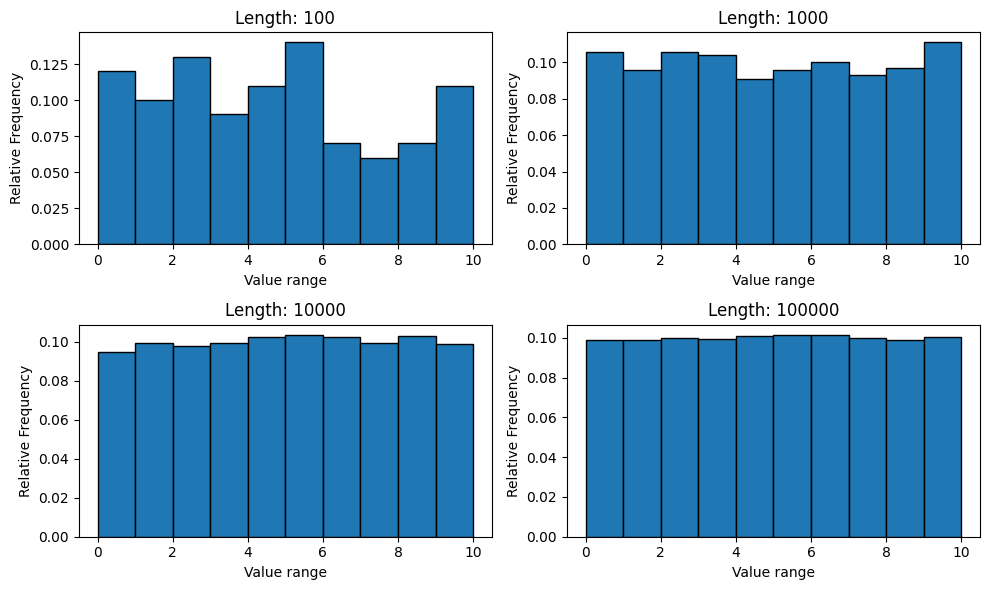

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histograms_in_grid(lengths, bins_list, relative_freqs_list):
    # Определяем количество строк и столбцов для графиков
    num_plots = len(lengths)
    cols = 2  # По 2 графика на строку
    rows = (num_plots + 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(10, 6))
    axes = axes.flatten()  # Выравниваем оси в одномерный массив
    
    for i, (length, bins, relative_freqs) in enumerate(zip(lengths, bins_list, relative_freqs_list)):
        axes[i].bar(bins[:-1], relative_freqs, width=bins[1] - bins[0], align="edge", edgecolor="black")
        axes[i].set_title(f"Length: {length}")
        axes[i].set_xlabel("Value range")
        axes[i].set_ylabel("Relative Frequency")
    
    # Убираем пустые оси, если графиков меньше, чем количество мест
    for i in range(len(lengths), rows * cols):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

def chi_squared_test(frequencies, n, p_j):
    chi_square_value = np.sum(((frequencies - n * p_j) ** 2) / (n * p_j))
    return chi_square_value

# Генерация последовательностей
A = 0
B = 10
lengths = [10**2, 10**3, 10**4, 10**5]
num_bins = 10
p_j = 1 / num_bins  # Вероятность для каждого участка в равномерном распределении

bins_list = []
relative_freqs_list = []

for length in lengths:
    # Генерация последовательности
    sample = generate_uniform_sequence(A, B, n = length)
    
    # Получение относительных частот и абсолютных частот
    bins, relative_freqs, frequencies = relative_frequencies(sample, A, B, num_bins)
    bins_list.append(bins)
    relative_freqs_list.append(relative_freqs)
    
    # Расчет критерия Пирсона
    chi_square_value = chi_squared_test(frequencies, length, p_j)
    print(f"Length: {length}, Chi-Square value: {chi_square_value:.5f}")

# Построение гистограмм в виде таблицы графиков
plot_histograms_in_grid(lengths, bins_list, relative_freqs_list)


### Задание 7

Length: 100, Mean: 0.54025, Variance: 0.08109
Length: 100, Period: None
Length: 100, Chi-Square value: 10.80000
Length: 1000, Mean: 0.50710, Variance: 0.08224
Length: 1000, Period: 344
Length: 1000, Chi-Square value: 5.56000
Length: 10000, Mean: 0.50175, Variance: 0.08336
Length: 10000, Period: 44
Length: 10000, Chi-Square value: 14.58800
Length: 100000, Mean: 0.49956, Variance: 0.08329
Length: 100000, Period: 63
Length: 100000, Chi-Square value: 11.74660


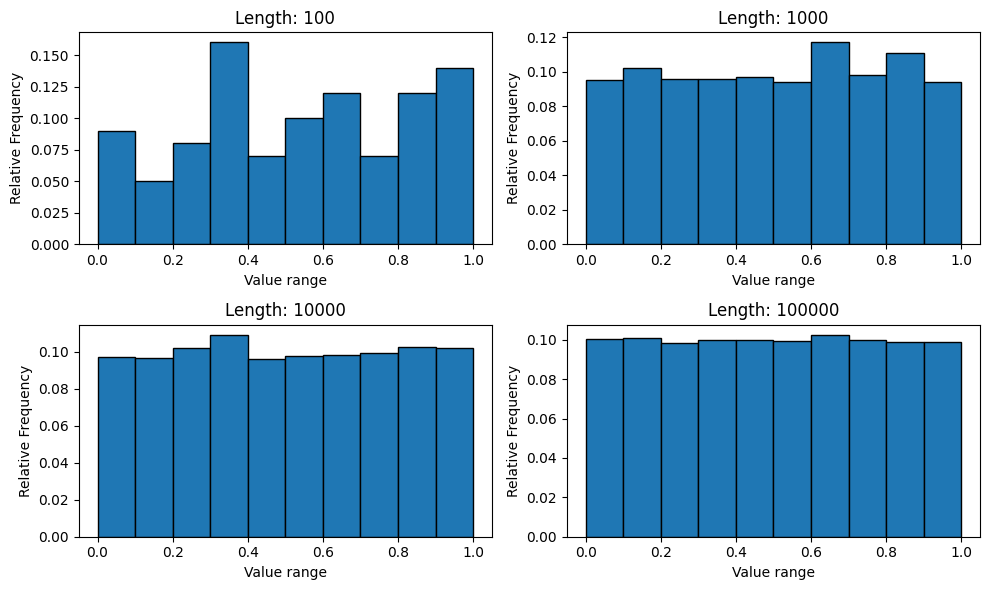

In [36]:
import numpy as np
import matplotlib.pyplot as plt


# Функция для построения гистограммы
def plot_histograms_in_grid(lengths, bins_list, relative_freqs_list):
    num_plots = len(lengths)
    cols = 2  # По 2 графика на строку
    rows = (num_plots + 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(10, 6))
    axes = axes.flatten()
    
    for i, (length, bins, relative_freqs) in enumerate(zip(lengths, bins_list, relative_freqs_list)):
        axes[i].bar(bins[:-1], relative_freqs, width=bins[1] - bins[0], align="edge", edgecolor="black")
        axes[i].set_title(f"Length: {length}")
        axes[i].set_xlabel("Value range")
        axes[i].set_ylabel("Relative Frequency")
    
    for i in range(len(lengths), rows * cols):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

# Функция для расчета критерия Пирсона
def chi_squared_test(frequencies, n, p_j):
    chi_square_value = np.sum(((frequencies - n * p_j) ** 2) / (n * p_j))
    return chi_square_value

# Генерация последовательностей с использованием встроенного генератора
lengths = [10**2, 10**3, 10**4, 10**5]
num_bins = 10
p_j = 1 / num_bins

bins_list = []
relative_freqs_list = []

for length in lengths:
    # Генерация последовательности с помощью np.random.random
    sample = np.random.random(length)
    
    # Расчет математического ожидания и дисперсии
    mean = calculate_mean(sample)
    variance = calculate_variance(sample, mean)
    print(f"Length: {length}, Mean: {mean:.5f}, Variance: {variance:.5f}")
    
    # Определение периода
    period = find_period_in_sequence(sample)
    print(f"Length: {length}, Period: {period}")
    
    # Расчет относительных частот и построение гистограмм
    bins, relative_freqs, frequencies = relative_frequencies(sample, 0, 1, num_bins)
    bins_list.append(bins)
    relative_freqs_list.append(relative_freqs)
    
    # Расчет критерия Пирсона
    chi_square_value = chi_squared_test(frequencies, length, p_j)
    print(f"Length: {length}, Chi-Square value: {chi_square_value:.5f}")

# Построение гистограмм в виде таблицы
plot_histograms_in_grid(lengths, bins_list, relative_freqs_list)
